In [2]:
from ipynb.fs.full.treeInput import *

### 4 function API 

insert -> insertion in BST has a logic and therefore the tree should get created directly -> no worries like Binary Tree that we need to decide insertion order beforehand<br> 
search <br>
delete <br>
count <br>

### Dummy structure of BST Class

In [ ]:
'''class BST:
    
    def __init__(self):
        
        self.root = None
        self.numNodes = 0
    
    def printTree(self):
        return
    
    def isPresent(self, data):
        return False
    
    def insert(self, data):
        return
    
    def deleteData(self, data):
        return False
    
    def count(self):
        return 0
        
'''

## BST class implementation

### Commentary about each function <br>

#### Problem - ( common problem for all functions ) :

**We can't use recursion here (in printTree and search function) as in the function signature user does not pass any root reference. Root is maintained within class and therefore user can't access it and hence we are also not asking user to input it.**
            
#### Solution : 

**Use a helper function where root can be passed. (other option was solve "iteratively")**

### Insert function

**Steps**

Step-1 :  If root is None: Create a node with the data and return the node. <br>
Step-2 :  Check whether to call on left or right of the root for insertion based on the value to be inserted. <br>
Step-3 :  Call on that side and keep calling till you reach a NONE node. <br>
Step-4 :  At NONE value, create a new node with the given value and return it. <br>
Step-5 :  This returned new node must be attached to its parent node so do root.right = insert(root.right, value) or root.left = insert(root.left, value) <br>
Step-6 :  To maintain this order you need to return root at each recursive call so that rest of tree is maintained <br>

### Delete function

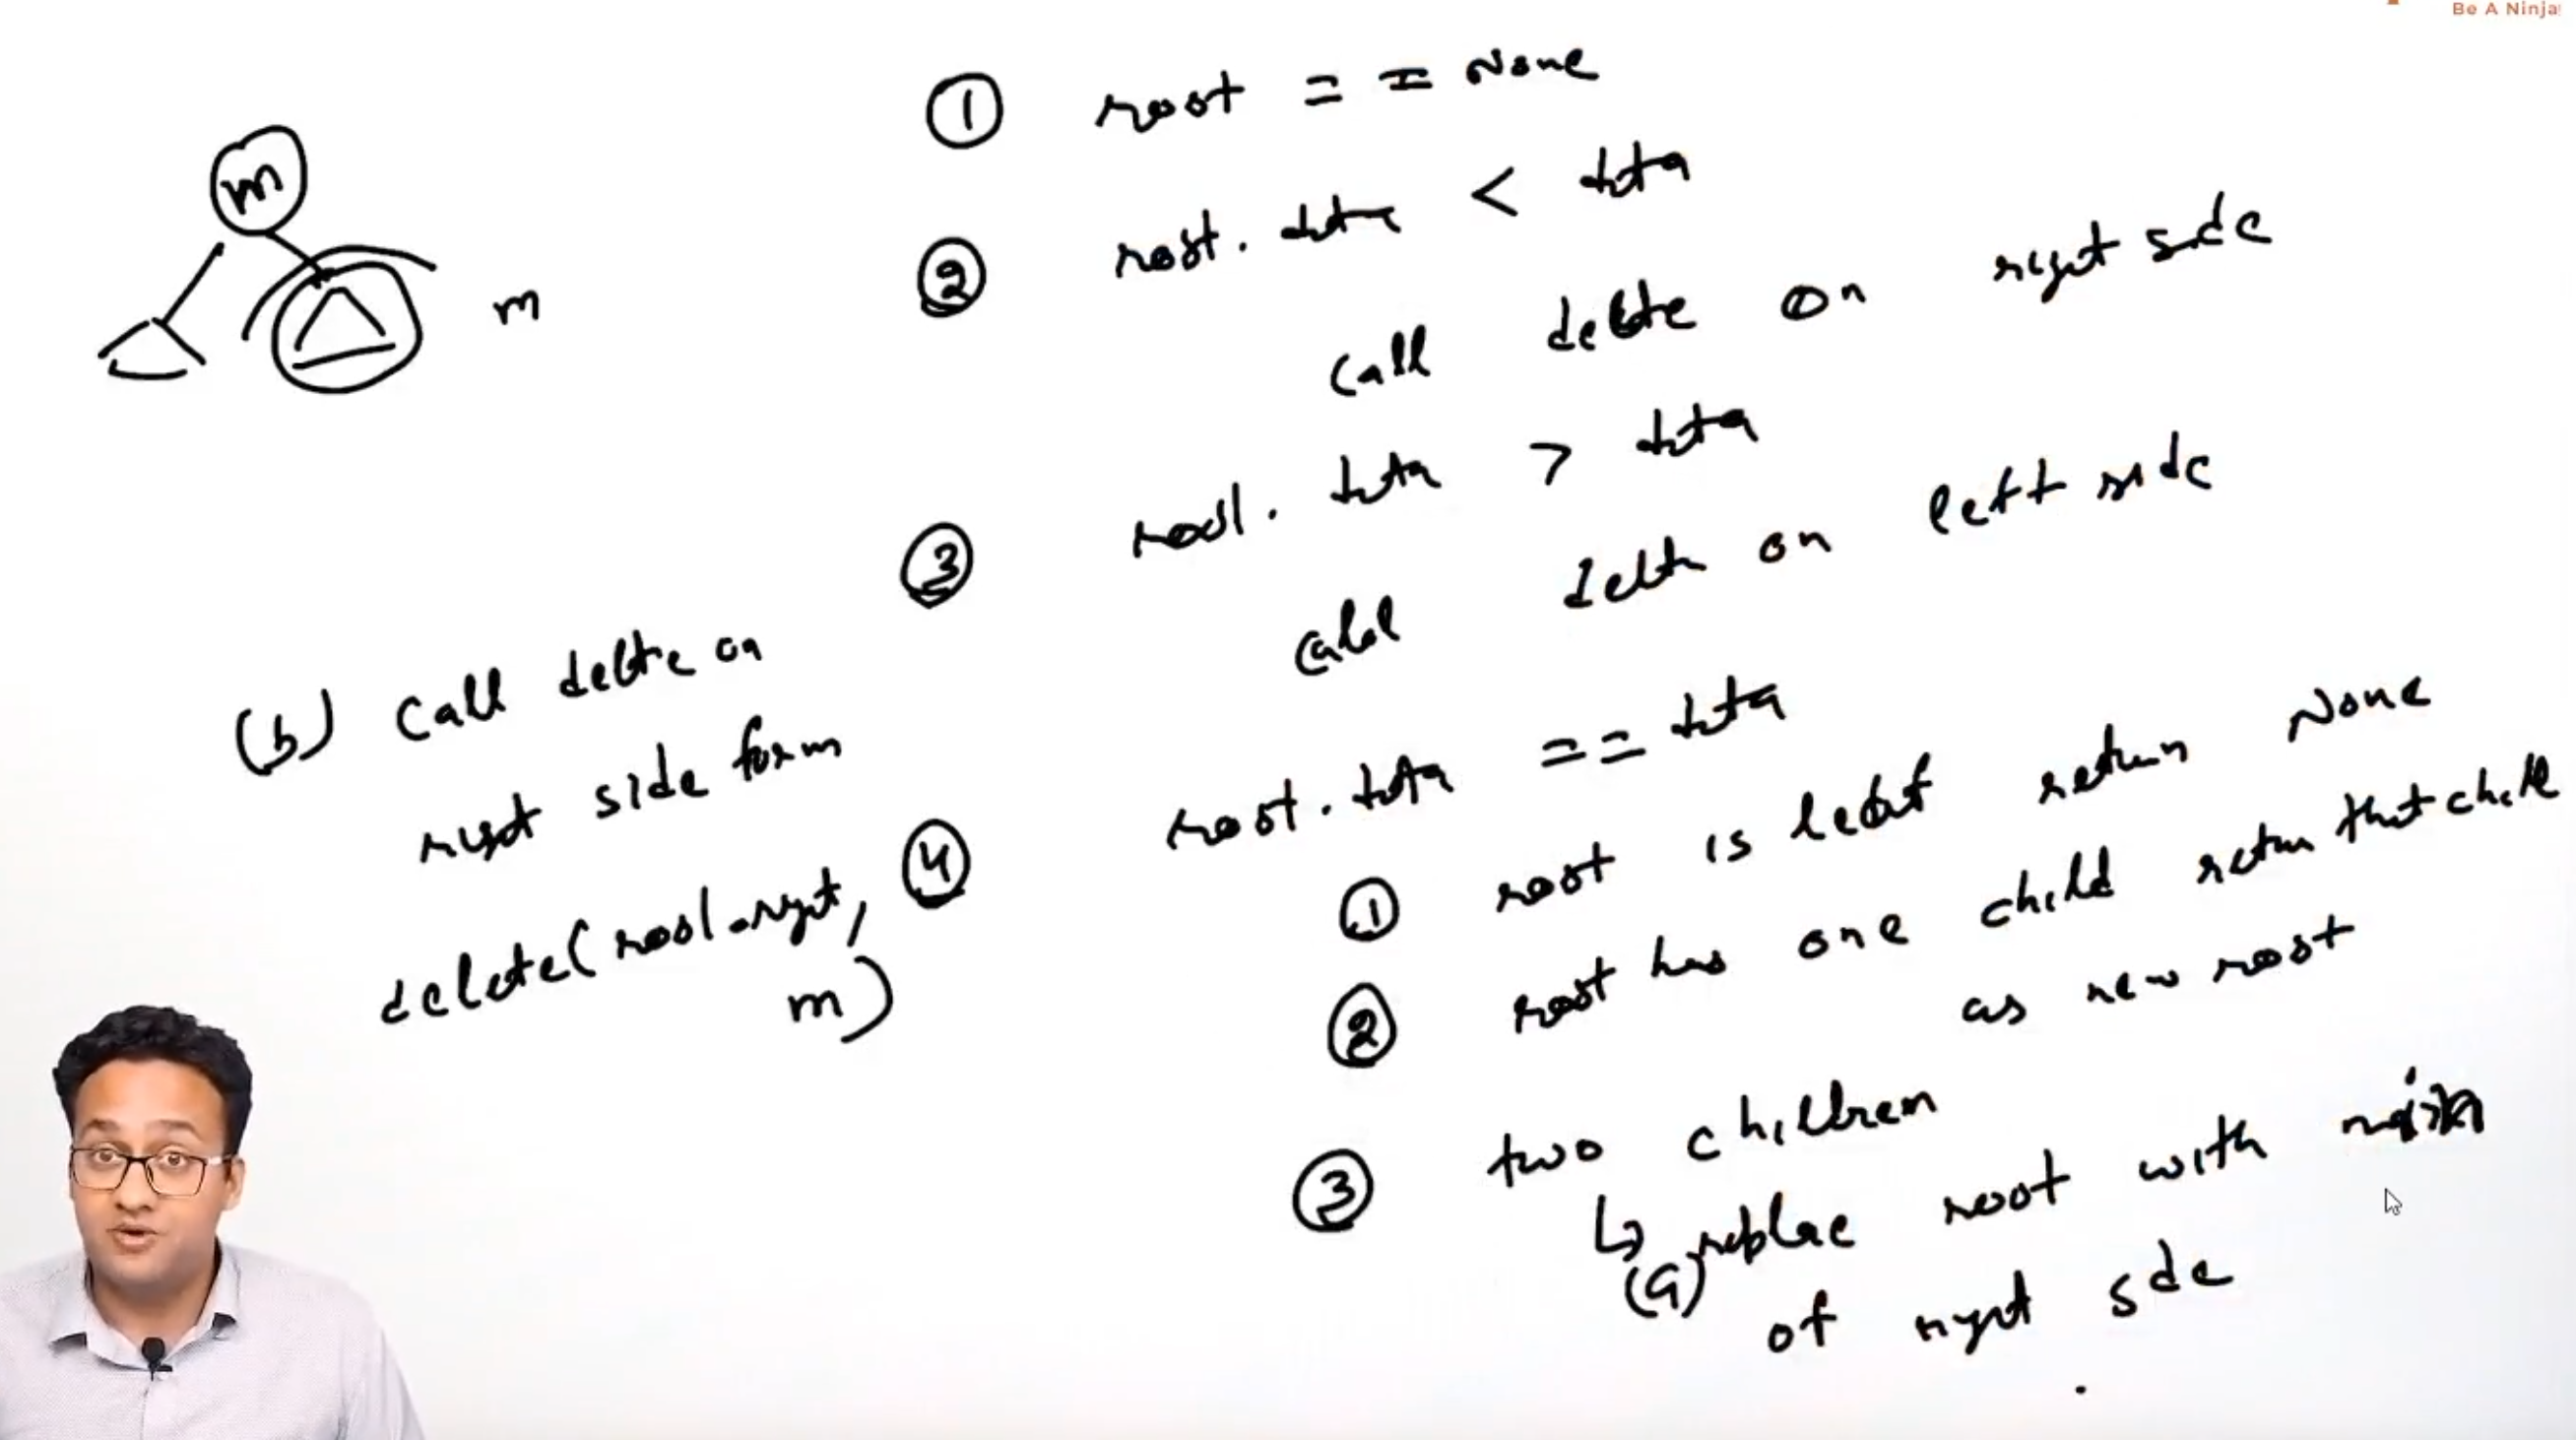

#### Explanation for delete function.

if node is found, then we return True , else we return False if the node does not exist in tree.<br>

Delete function gets tricky when you have found the node to be delete.<br><br>

Since we will do it recursively we can think removing node as removing root.<br>

#### Here, there can be 3 cases :- <br>

**Case-1** : Root is a leaf -> then just return None -> this None either gets attached to the parent of the root ( as left or right child ) or root itself becomes None. <br>

**Case-2** : Root has 1 child -> in such a case -> that child node will be returned and set as reference of parent's left or right child or becomes the root itself. <br>

**Case-3** : Root has 2 child -> Tricky. <br>

Just think about this case : if the root is removed of such a tree, then the tree needs to be restrucutred. This restructuring can be done in 2 ways ( for clarity write BST as a sorted array ).<br><br>
***Option-1*** : Take the max of left subtree and set it as root. Here the problem is if there are 2 nodes with same max value then we end up with a wrong BST since left_subtree == root.data is a wrong case for a BST.<br><br>
***Option-2*** : Take the minimum of the right subtree, make it as root and remove the node with that value. In this case we get a correct BST always as even if there is a duplicate minimum on right we get root.data == right_subtree which is a valid case.<br>

    Step-1 : Replace the value of root node by a node with minimum on the right side.
    Step-2 : Delete that right child node ( this will trigger a recursion )

**NOTE : Finding a minimum in the BST for Case-3 where root has 2 child:**

Minimum in a BST can be either root or in the LEFT SUBTREE -> Cannot be on the right subtree.

def minimum(self, root):<br>
        
    if root is None:
        return float("inf")
        
    if root.left is None:
        return root.data
        
    return self.minimum(root.left)

In [8]:
class BinaryTreeNode:
    
    def __init__(self, data):
        
        self.data = data
        self.left = None
        self.right = None

In [29]:
class BST:
    
    def __init__(self):
        
        self.__root = None
        self.__numNodes = 0
    
    def printTreeHelper(self, root):
        
        if root is None:
            return
    
        print(root.data, ":", end=" ")
    
        if root.left is not None:
            print("L",root.left.data, end=", ")
        if root.right is not None:
            print("R", root.right.data, end="")
        print()
    
        self.printTreeHelper(root.left)
        self.printTreeHelper(root.right)
    
    def printTree(self):
        
        self.printTreeHelper(self.__root)
    
    def isPresentHelper(self, root, data):
        
        if root is None:
            return False
        
        if root.data == data:
            return True
        
        if root.data > data:
            return self.isPresentHelper(root.left, data)
        else:
            return self.isPresentHelper(root.right, data)
    
    def isPresent(self, data):
            
        return self.isPresentHelper(self.__root, data)
    
    def insertHelper(self, root, data):
        
        if root is None:
            node = BinaryTreeNode(data)
            return node
        
        if root.data > data:
            root.left = self.insertHelper(root.left, data)
        else:
            root.right = self.insertHelper(root.right, data)
            
        return root
    
    def insert(self, data):
        self.__numNodes +=1
        self.__root = self.insertHelper(self.__root, data) #if root is None then we need to update that variable
    
    # minimum in a BST can be either root or in the LEFT SUBTREE -> Cannot be on the right subtree 
    def minimum(self, root):
        
        if root is None:
            return float("inf")
        
        if root.left is None:
            return root.data
        
        return self.minimum(root.left)
    
    def deleteDataHelper(self, root, data):
        
        if root is None:
            return False, None
        
        if root.data < data:
            deleted, newRightNode = self.deleteDataHelper(root.right, data)
            root.right = newRightNode
            return deleted, root
        
        if root.data > data:
            deleted, newLeftNode = self.deleteDataHelper(root.left, data)
            root.left = newLeftNode
            return deleted, root
        
        # this is a redundant check as if it is not the above 2 ineuqalities < or > , then it has to be ==
        if root.data == data:
            # root is leaf
            if root.left is None and root.right is None:
                return True, None
            
            # root has only 1 child -> right child
            elif root.left is None:
                return True, root.right
            
            # root has only 1 child -> left child
            elif root.right is None:
                return True, root.left
            
            # root has both child 
            else:
                replacement = self.minimum(root.right) # find minimum in right to make it new root 
                root.data = replacement # removing node by replacing data and not changing reference
                deleted, newRightNode = self.deleteDataHelper(root.right, replacement)
                root.right = newRightNode
                return True, root  # since we replaced the node by data and not reference we can return same root.
        
        
    def deleteData(self, data):

        deleted, newRoot = self.deleteDataHelper(self.__root, data)
        if deleted:
            self.__numNodes -=1

        self.__root = newRoot

        return deleted
    
    def count(self):
        return self.__numNodes

In [30]:
b = BST()
b.insert(10)
b.insert(5)
b.insert(7)
b.insert(6)
b.insert(8)
b.insert(12)
b.insert(11)
b.insert(15)
b.printTree()
print("count of nodes in tree", b.count())
b.deleteData(8)
b.printTree()
print("count of nodes in tree", b.count())
b.deleteData(5)
b.printTree()
print("count of nodes in tree", b.count())
b.deleteData(10)
b.printTree()
print("count of nodes in tree", b.count())

10 : L 5, R 12
5 : R 7
7 : L 6, R 8
6 : 
8 : 
12 : L 11, R 15
11 : 
15 : 
count of nodes in tree 8
HELLOOOOOOOOOO
10 : L 5, R 12
5 : R 7
7 : L 6, 
6 : 
12 : L 11, R 15
11 : 
15 : 
count of nodes in tree 7
HELLOOOOOOOOOO
10 : L 7, R 12
7 : L 6, 
6 : 
12 : L 11, R 15
11 : 
15 : 
count of nodes in tree 6
HELLOOOOOOOOOO
HELLOOOOOOOOOO
HELLOOOOOOOOOO
11 : L 7, R 12
7 : L 6, 
6 : 
12 : R 15
15 : 
count of nodes in tree 5


### Time complexities = O(height) for all functions but see explanation :- (Vid : BST-2 ; Time = -06.45)

**Search function**: = O(height)

You keep going left or right of node (down the tree) in search of the value, therefore the max down the tree you need to go is total height of the tree.  

**Insert function**: = O(height)

Same as search, you need to keep going down the tree to either left or right side in search of appropriate place to insert. Therefore the max you need to travel down is complete height of the tree, which will be the case where that node must be a leaf.  

**delete function**: = O(height) -> node here would mean "node to be deleted"

Case-1 : node is leaf = O(height) -> You just need to traverse to where the node is and return None <br>
Case-2 : node has 1 child = O(height) -> You just need to traverse to the node and return its left or right child. <br>
Case-3 : node has both child <br>

    Step-1 : Finding the node to be deleted = O(k) -> where k is the height at which node is found.
    Step-2 : Find the minimum 'm' on the right side of that node = O(h-k) -> h-k is the height of tree left
    Step-3 : Deleted the minimum 'm' node on the right subtree = O(h-k) . WHY ?
    
            Q) Why is Step-3 complexity is O(h-k) here ?.
            
            The minimum node 'm' to be found cannot be a node with left child atleast as then that left child
            would be the minimum. Therefore the case can be that either that minimum node is a leaf (CASE-1) or
            the minimum node has only 1 child (CASE-2) and complexity of both the cases CASE-1 and CASE-2 is 
            O(height) and here height left is "h-k", therefore Step-3 complexity is O(h-k)
            
            
            Summing the complexity of the 3 steps above we get O(2h-k) = O(h) = O(height)
            
            
            





### Important consideration:

**Complexity of search, insert, delete = O(height)**

Therefore, we want our tree to be BALANCED Binary Tree as then our height = logn and therefore all our operations would be O(logn).  

Therefore we should try to keep our tree balanced as then all our operations would be better than say linked list, stacks and queues which are usually O(n).  

Our current implementation of BST is NOT a balanced one. Try inserting in order 1,2,3,...  

**Balanced Tree = difference between height of left subtree and right subtree is NOT GREATER THAN 1.**  

Few examples of self balancing binary trees are **AVL trees, Red-Black trees etc**.  

**AVL Tree case** :  whenever the height difference between left or right subtree is greater than 1, then rotate the tree clockwise or anticlockwise.

